In [13]:
import numpy as np  # For numerical operations
import pyttsx3  # For text-to-speech functionality
from sklearn.linear_model import LinearRegression  # For linear regression model


In [14]:
# Load your Dataset
voltage = np.array([1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5]).reshape(-1, 1)  # Voltage (V)
current = np.array([0.09, 0.33, 0.73, 1.6, 1.73, 2.43, 2.6, 3.75, 4.29, 4.5, 5.76])  # Current (A)
hpr = np.array([0.65, 2.5, 5.5, 12, 15, 20, 25, 30, 35, 35, 45])  # Hydrogen Production Rate (ml/min)



In [15]:
# Concatenate voltage and current into a single feature matrix
X = np.hstack((voltage, current.reshape(-1, 1)))

In [16]:
# Train Linear Regression model
model = LinearRegression()
model.fit(X, hpr)

LinearRegression()

In [17]:
# Define a range of voltage values to consider
voltage_range = np.linspace(1.5, 2.5, 100).reshape(-1, 1)

while True:
    # Choose a random current value from the provided dataset
    random_current = np.random.choice(current)

    # Predict HPR for each voltage value in the range with the random current
    predicted_hpr = model.predict(np.hstack((voltage_range, np.full_like(voltage_range, random_current))))

    # Check if any predicted HPR is greater than 50 ml/min
    if np.any(predicted_hpr > 40):
        # Select the first voltage value that leads to HPR > 50 ml/min
        recommended_voltage = voltage_range[np.argmax(predicted_hpr > 40)]
        recommended_hpr = np.max(predicted_hpr[predicted_hpr > 40])
        break

In [18]:
print("Random Current:", random_current, "A")
print("Recommended Voltage:", recommended_voltage[0], "V")
print("Predicted HPR:", recommended_hpr, "ml/min")


Random Current: 5.76 A
Recommended Voltage: 2.2676767676767677 V
Predicted HPR: 44.695449208982346 ml/min


In [19]:

# Speak the result using text-to-speech
engine = pyttsx3.init()
engine.say(f"Recommended Voltage: {recommended_voltage[0]}V with Random Current: {random_current}A, Predicted Hydrogen Production Rate: {recommended_hpr} ml per minute")
engine.runAndWait()

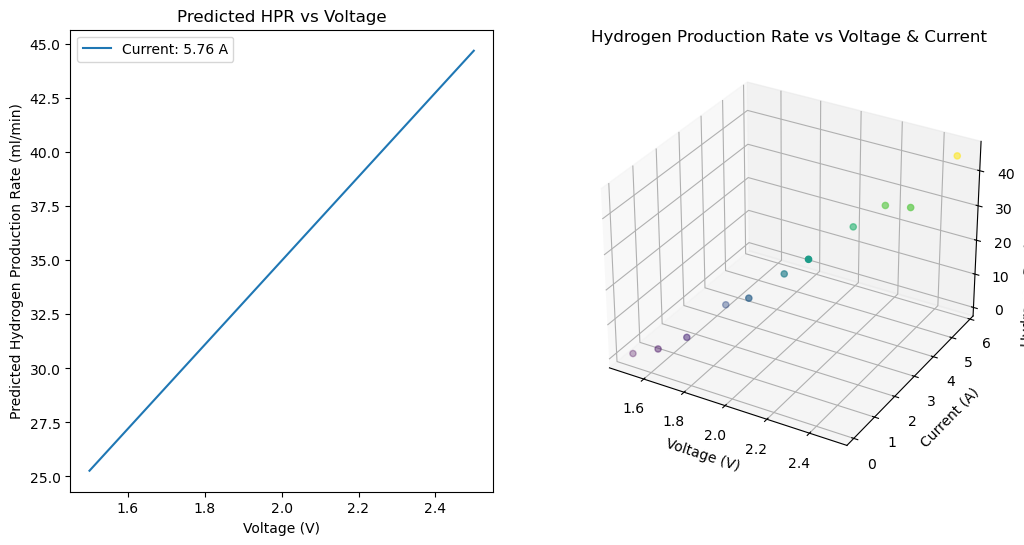

In [22]:
# Plotting the data
import matplotlib.pyplot as plt  # For plotting graphs

fig = plt.figure(figsize=(12, 6))

# Plot 2D graph: Voltage vs. Predicted HPR for the random current
plt.subplot(1, 2, 1)
plt.plot(voltage_range, predicted_hpr, label=f'Current: {random_current} A')
plt.xlabel('Voltage (V)')
plt.ylabel('Predicted Hydrogen Production Rate (ml/min)')
plt.title('Predicted HPR vs Voltage')
plt.legend()

# Plot 3D graph: Voltage, Current, and Hydrogen Production Rate (original data)
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter(voltage, current, hpr, c=hpr, cmap='viridis')
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('Current (A)')
ax.set_zlabel('Hydrogen Production Rate (ml/min)')
ax.set_title('Hydrogen Production Rate vs Voltage & Current')

# Display the plots
plt.show()
